Importing Important Libraries for web scraping

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup as soup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#reading th url
 
httpObject = urlopen("https://www.flipkart.com/q/best-laptops-under-rs-50000?page=1")
webdata = httpObject.read()
webdata

b'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

In [3]:
soup1 = soup(webdata)

In [4]:
pages_link = soup1.find_all('a',{'class' : 'ge-49M'})
domain = 'https://www.flipkart.com/q/best-laptops-under-rs-50000?page='

for i in range(2,36):
    link = domain + str(i)
    page_data = urlopen(link)
    webdata1 = page_data.read()
    webdata += webdata1

In [5]:
soupdata = soup(webdata,'html.parser')
type(soupdata)

bs4.BeautifulSoup

In [6]:
containers = soupdata.find_all('div',{'class':'_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 840


In [7]:
dir(containers)

['__add__',
 '__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort',
 'source']

In [8]:
#data of first container
containers[0]

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-ryzen-5-hexa-core-5500u-8-gb-512-gb-ssd-windows-11-home-15s-eq2144au-thin-light-laptop/p/itm1eb242c8ec463?pid=COMGBH9JDPVGD8BH&amp;lid=LSTCOMGBH9JDPVGD8BHIZPQIL&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;srno=b_1_1&amp;otracker=browse&amp;fm=organic&amp;iid=f27e5ea6-3ad3-4a11-85b6-fa7d193b874d.COMGBH9JDPVGD8BH.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=5b2h27iwww0000001672665506930" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP Ryzen 5 Hexa Core 5500U - (8 GB/512 GB SSD/Windows 11 Home) 15s- eq2144au Thin and Light Laptop" class="_396cs4" loading="eager" src="https://rukminim1.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH1S" readonly="" type="checkbox"/><div class

In [9]:
f = open('laptops_info.csv','wb')
f.write('ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL\n'.encode())
for container in containers:
    #Finding Product Name
    product = container.find_all('div',{'class' : '_4rR01T'})
    ProductName = product[0].text.split('-')[0].strip()
    print(ProductName)

    #finding Stars
    star = container.find('div',{'class' : '_3LWZlK'})
    try:
        Stars = star.text
    except:
        Stars = 0

    #Finding Ratings and Reviews
    import re
    Rating = container.find('span',{'class' : '_2_R_DZ'})
    try:
        ratRev = re.findall('\d+,*\d*',Rating.text)
        Ratings= ratRev[0].replace(',','')
        Reviews = ratRev[1].replace(',','')
    except:
        Ratings = 0
        Reviews = 0

    # Finding Current Price

    CurrentPrice = container.find('div',{'class' : '_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')

    #Finding MRP

    mrp = container.find('div',{'class' : '_3I9_wc _27UcVY'})
    try:
        MRP = mrp.text.replace(',','').replace('₹','')
    except:
        MRP = 0

    # Finding information about the Product    

    info = container.find_all('li',{'class' : 'rgWa7D'})
    Processor = info[0].text
    RAM = info[1].text
    Storage = info[3].text
    


    Image = container.img
    ImageURL = Image.get('src')

    print(ProductName, Stars, Ratings, Reviews, CurrentPrice, MRP, Processor, RAM, Storage, ImageURL)
    f.write(f"{ProductName},{Stars},{Ratings},{Reviews},{CurrentPrice},{MRP},{Processor},{RAM},{Storage},{ImageURL}\n".encode())
    print('\n')
f.close()

HP Ryzen 5 Hexa Core 5500U
HP Ryzen 5 Hexa Core 5500U 4.3 900 72 46990 60248 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70


HP 14s Intel Core i3 11th Gen
HP 14s Intel Core i3 11th Gen 4.2 3161 289 40990 49509 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/l5h2xe80/computer/h/i/p/14s-dy5005tu-thin-and-light-laptop-hp-original-imagg4rc7n75zqkp.jpeg?q=70


MSI Bravo 15 Ryzen 5 Hexa Core AMD R5
MSI Bravo 15 Ryzen 5 Hexa Core AMD R5 4.4 1946 265 57990 72990 AMD Ryzen 5 Hexa Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/xif0q/computer/7/3/l/-original-imagha3pvvc2xuz2.jpeg?q=70


HP Core i3 11th Gen
HP Core i3 11th Gen 4.2 44 1 35999 45743 Intel Core i3 Processor (11th Gen) 8 GB DDR4 RAM 512 GB SSD https://rukminim1.flixcart.com/image/312/312/kwtkxow0/computer/j/d/r/hp-business-laptop

In [10]:
df = pd.read_csv('laptops_info.csv', error_bad_lines= False)
df

C:\Users\91819\AppData\Local\Temp\ipykernel_600\376792310.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('laptops_info.csv', error_bad_lines= False)
b'Skipping line 28: expected 10 fields, saw 12\nSkipping line 158: expected 10 fields, saw 12\nSkipping line 160: expected 10 fields, saw 11\nSkipping line 210: expected 10 fields, saw 11\nSkipping line 220: expected 10 fields, saw 12\nSkipping line 327: expected 10 fields, saw 14\nSkipping line 369: expected 10 fields, saw 14\nSkipping line 413: expected 10 fields, saw 14\nSkipping line 420: expected 10 fields, saw 11\nSkipping line 487: expected 10 fields, saw 17\nSkipping line 633: expected 10 fields, saw 13\nSkipping line 647: expected 10 fields, saw 12\nSkipping line 660: expected 10 fields, saw 13\nSkipping line 664: expected 10 fields, saw 14\nSkipping line 690: expected 10 fields, saw 12\nSkipping line 699: expected 

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
0,HP Ryzen 5 Hexa Core 5500U,4.3,900,72,46990,60248,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
1,HP 14s Intel Core i3 11th Gen,4.2,3161,289,40990,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
2,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,4.4,1946,265,57990,72990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
3,HP Core i3 11th Gen,4.2,44,1,35999,45743,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,HP Core i3 11th Gen,4.1,257,31,41990,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...,...
810,DELL Inspiron Core i5 11th Gen,4.3,210,29,74990,78900,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
811,DELL Allienware Core i7 12th Gen,0.0,0,0,300490,1174131,Intel Core i7 Processor (12th Gen),32 GB DDR5 RAM,1 TB SSD,https://rukminim1.flixcart.com/image/312/312/x...
812,ASUS TUF GAMING F15 Core i5 10th Gen,4.5,36,1,63980,82990,Intel Core i5 Processor (10th Gen),16 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
813,acer Travelmate Core i5 11th Gen,4.0,43,10,56034,60000,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductName   815 non-null    object 
 1   Stars         815 non-null    float64
 2   Ratings       815 non-null    int64  
 3   Reviews       815 non-null    int64  
 4   CurrentPrice  815 non-null    int64  
 5   MRP           815 non-null    int64  
 6   Processor     815 non-null    object 
 7   RAM           815 non-null    object 
 8   Storage       815 non-null    object 
 9   ImageURL      815 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 63.8+ KB


Find the product/products having highest Ratings

In [12]:
df.loc[df['Ratings'] == df['Ratings'].max()]

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
101,APPLE MacBook Air Core i5 5th Gen,4.7,30952,3303,74490,84900,Intel Core i5 Processor (5th Gen),8 GB DDR3 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/j...
126,APPLE MacBook Air Core i5 5th Gen,4.7,30952,3303,74490,84900,Intel Core i5 Processor (5th Gen),8 GB DDR3 RAM,128 GB SSD,https://rukminim1.flixcart.com/image/312/312/j...


In [13]:
top5 = df.sort_values(by='Ratings', ascending= False).head()

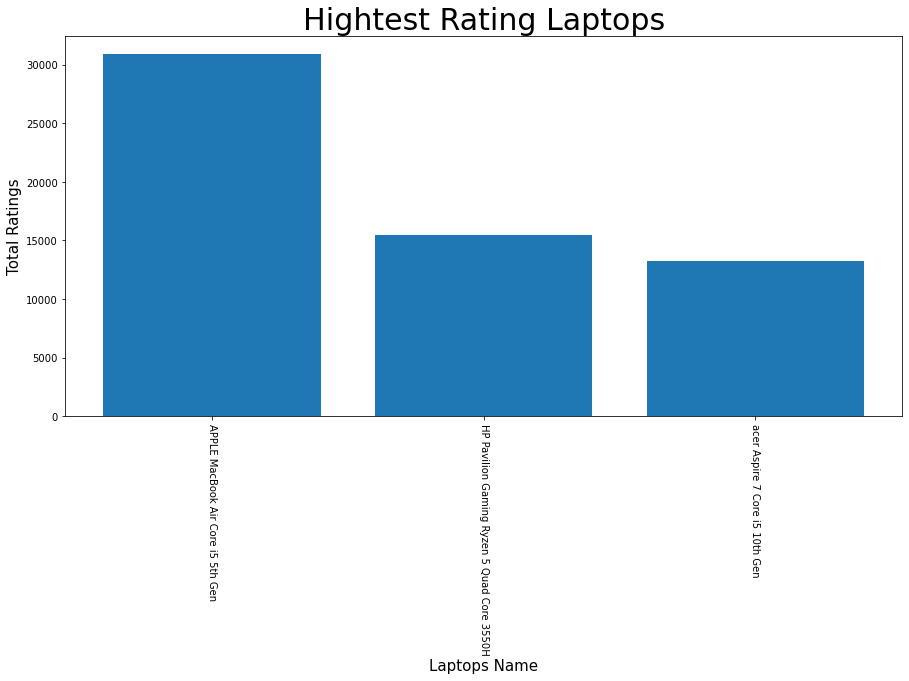

In [14]:
plt.figure(figsize=(15,7))
plt.bar(x=top5['ProductName'], height=top5['Ratings'])
plt.title('Hightest Rating Laptops',fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Total Ratings', fontsize=15)
plt.xticks(rotation =270)
plt.savefig('HigestRatingLaptops.jpg')
plt.show()

Most Affordable Laptops

In [15]:
Affordability = df.sort_values(by='CurrentPrice', ascending= True).head(10)

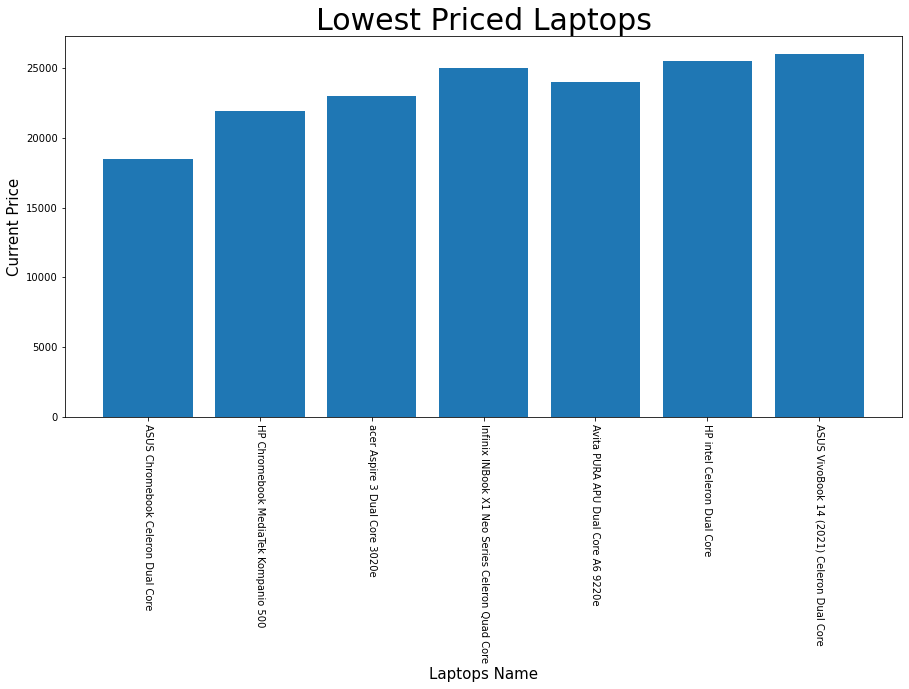

In [16]:
plt.figure(figsize=(15,7))
plt.bar(x=Affordability['ProductName'], height=Affordability['CurrentPrice'])
plt.title('Lowest Priced Laptops',fontsize=30)
plt.xlabel('Laptops Name', fontsize=15)
plt.ylabel('Current Price', fontsize=15)
plt.xticks(rotation =270)
plt.show()

In [17]:
smalldf = df[['ProductName','CurrentPrice','MRP']]
smalldf

,ProductName,CurrentPrice,MRP
0,HP Ryzen 5 Hexa Core 5500U,46990,60248
1,HP 14s Intel Core i3 11th Gen,40990,49509
2,MSI Bravo 15 Ryzen 5 Hexa Core AMD R5,57990,72990
3,HP Core i3 11th Gen,35999,45743
4,HP Core i3 11th Gen,41990,50585
...,...,...,...
810,DELL Inspiron Core i5 11th Gen,74990,78900
811,DELL Allienware Core i7 12th Gen,300490,1174131
812,ASUS TUF GAMING F15 Core i5 10th Gen,63980,82990
813,acer Travelmate Core i5 11th Gen,56034,60000


In [18]:
midrange_laptops = df[(df['CurrentPrice']<45000) & (df['CurrentPrice']>30000)]

In [19]:
midrange_laptops

,ProductName,Stars,Ratings,Reviews,CurrentPrice,MRP,Processor,RAM,Storage,ImageURL
1,HP 14s Intel Core i3 11th Gen,4.2,3161,289,40990,49509,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
3,HP Core i3 11th Gen,4.2,44,1,35999,45743,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/k...
4,HP Core i3 11th Gen,4.1,257,31,41990,50585,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
6,HP Ryzen 3 Quad Core 5300U,4.2,1681,191,39000,45991,AMD Ryzen 3 Quad Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
7,HP 15s Intel Core i3 11th Gen,4.2,184,16,41990,47834,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim1.flixcart.com/image/312/312/l...
...,...,...,...,...,...,...,...,...,...,...
729,Lenovo Ryzen 3 Dual Core 3250U,3.5,76,16,31490,36923,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
749,Lenovo Ideapad S145 Ryzen 3 Dual Core 3200U,3.9,6197,934,30590,37190,AMD Ryzen 3 Dual Core Processor,4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
751,ASUS Vivobook 14 Core i3 10th Gen,3.6,68,10,30650,40990,Intel Core i3 Processor (10th Gen),4 GB DDR4 RAM,1 TB HDD,https://rukminim1.flixcart.com/image/312/312/k...
770,ASUS Ryzen 3 Dual Core,0.0,0,0,33990,48990,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,256 GB SSD,https://rukminim1.flixcart.com/image/312/312/x...
